## Crimes in Berlin

### Questions

- What part of Berlin is the most dangerous?
- What crimes are growing?
- What crimes are going low?
- Folium based heatmap.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Load Data

In [2]:
df = pd.read_csv('data/berlin_crimes.csv')

#### Read Data

In [3]:
df.head()

Year District   Code           Location  Robbery  Street_robbery  Injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   Agg_assault  Threat  Theft  Car  From_car  Bike  Burglary  Fire  Arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   Damage  Graffiti  Drugs  Local  
0     273        26    171   1032  
1     380       124     98    870  
2    1538       522    435   3108  
3     428       122    213    752  
4     516        64    259   1403

In [4]:
df.tail()

Year       District    Code                                Location  \
1195  2019  Reinickendorf  123012  Nord 2 - Waidmannslust/Wittenau/Lübars   
1196  2019  Reinickendorf  123021               MV 1 - Märkisches Viertel   
1197  2019  Reinickendorf  123022                 MV 2 - Rollbergsiedlung   
1198  2019  Reinickendorf  123043      West 3 - Borsigwalde/Freie Scholle   
1199  2019  Reinickendorf  129900           Bezirk (Rd), nicht zuzuordnen   

      Robbery  Street_robbery  Injury  Agg_assault  Threat  Theft  Car  \
1195       34              19     372           85     123   1160   30   
1196       42              22     491          123     187   1100   51   
1197        6               4      84           19      34    293   13   
1198        8               4      95           18      43    492   21   
1199        3               2      14            7       4     59    0   

      From_car  Bike  Burglary  Fire  Arson  Damage  Graffiti  Drugs  Local  
1195       135   150        93    16      3     306        74    110    728  
1196       224    76        40    39     19     286        11     73    986  
1197        36    18        34     5      2     156        56     21    212  
1198        96    69        38     6      1      79         8     31    218  
1199         7    15         0     1      0       7         3      9     21

In [5]:
df.iloc[0]

Year                        2012
District                   Mitte
Code                       10111
Location          Tiergarten Süd
Robbery                       70
Street_robbery                46
Injury                       586
Agg_assault                  194
Threat                       118
Theft                       2263
Car                           18
From_car                     328
Bike                         120
Burglary                      68
Fire                          16
Arson                          4
Damage                       273
Graffiti                      26
Drugs                        171
Local                       1032
Name: 0, dtype: object

In [6]:
df['Location'].unique()[:10]

array(['Tiergarten Süd', 'Regierungsviertel', 'Alexanderplatz',
       'Brunnenstraße Süd', 'Moabit West', 'Moabit Ost', 'Osloer Straße',
       'Brunnenstraße Nord', 'Parkviertel', 'Wedding Zentrum'],
      dtype=object)

In [8]:
# Checking Alexanderplatz, one of the most popular locations in Berlin
df_a = df.copy()
df_alexanderplatz = df_a[df_a['Location'] == 'Alexanderplatz']

Observation:
- A lot is happening in Alexanderplatz which is not surprising because it is one of the most popular and busiest places in Berlin.
- I am curious to know if there are en equal number of locations

In [9]:
df_alexanderplatz

Year District   Code        Location  Robbery  Street_robbery  Injury  \
2     2012    Mitte  10113  Alexanderplatz      242             136    1541   
152   2013    Mitte  10113  Alexanderplatz      237             149    1442   
302   2014    Mitte  10113  Alexanderplatz      203             106    1309   
452   2015    Mitte  10113  Alexanderplatz      157              90    1440   
602   2016    Mitte  10113  Alexanderplatz      165             102    1338   
752   2017    Mitte  10113  Alexanderplatz      143              90    1763   
902   2018    Mitte  10113  Alexanderplatz      130              80    1531   
1052  2019    Mitte  10113  Alexanderplatz      173             102    1966   

      Agg_assault  Threat  Theft  Car  From_car  Bike  Burglary  Fire  Arson  \
2             454     304   8988   81       792   822       275    49     27   
152           354     333  10165   85       760   926       281    47     20   
302           364     350  10510   89       710  1074       241    46     18   
452           408     320  12150   83       820  1082       236    35     12   
602           368     313  12479   80       779  1266       222    47     20   
752           478     317  10596   87       705   929       148    45     16   
902           366     309  10144   68       580   880       133    26      6   
1052          500     420  11233   63       587   940       137    43     12   

      Damage  Graffiti  Drugs  Local  
2       1538       522    435   3108  
152     1301       448    590   3029  
302     1207       351    506   2984  
452     1171       333    499   2973  
602     1065       328    534   2825  
752     1162       351    804   3227  
902     1036       333    971   2798  
1052    1307       381   1133   3813

In [10]:
df_alexanderplatz.set_index('Year', inplace=True)

In [11]:
df_alexanderplatz.columns

Index(['District', 'Code', 'Location', 'Robbery', 'Street_robbery', 'Injury',
       'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary',
       'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local'],
      dtype='object')

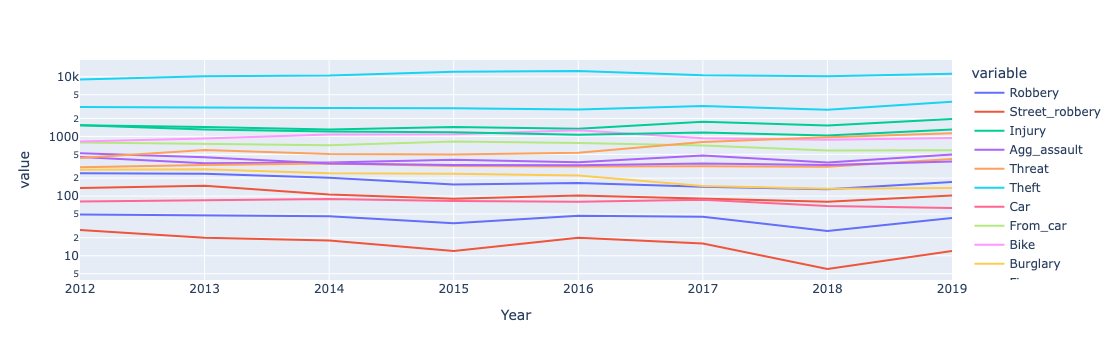

In [29]:
fig = px.line(df_alexanderplatz.iloc[:, 3:], x=df_alexanderplatz.iloc[:, 3:].index, y=df_alexanderplatz.columns[3:], log_y=True)
fig.show()

In [30]:
df['Location'].value_counts()[:10] # There are equal number of locations

Location
Tiergarten Süd                       8
Plänterwald                          8
Johannisthal                         8
Oberschöneweide                      8
Niederschöneweide                    8
Adlershof                            8
Köllnische Vorstadt/Spindlersfeld    8
Altglienicke                         8
Bohnsdorf                            8
Grünau                               8
Name: count, dtype: int64

In [31]:
# Are there equal number of locations for each district
df.groupby('District')['Location'].value_counts()[:10]

District                    Location                        
Charlottenburg-Wilmersdorf  Barstraße                           8
                            Bezirk (Ch-Wi), nicht zuzuordnen    8
                            Charlottenburg-Nord                 8
                            Düsseldorfer Straße                 8
                            Forst Grunewald                     8
                            Grunewald                           8
                            Halensee                            8
                            Heerstrasse                         8
                            Kantstraße                          8
                            Kurfürstendamm                      8
Name: count, dtype: int64

For each District, each location appears 8 times

In [32]:
# Checking the District in Alexanderplatz (Mitte)
# I would like to know if, in each year, the same locations are considered for each district.
df[df['District'] == 'Mitte'].head()

Year District   Code           Location  Robbery  Street_robbery  Injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   Agg_assault  Threat  Theft  Car  From_car  Bike  Burglary  Fire  Arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   Damage  Graffiti  Drugs  Local  
0     273        26    171   1032  
1     380       124     98    870  
2    1538       522    435   3108  
3     428       122    213    752  
4     516        64    259   1403

In [33]:
# Just checking if the districts are uniform
df['District'].value_counts()

District
Treptow-Köpenick              168
Charlottenburg-Wilmersdorf    144
Pankow                        136
Lichtenberg                   112
Reinickendorf                  96
Mitte                          88
Neukölln                       88
Spandau                        80
Marzahn-Hellersdorf            80
Friedrichshain-Kreuzberg       72
Steglitz-Zehlendorf            72
Tempelhof-Schöneberg           64
Name: count, dtype: int64

<h3>Observation</h3>
<ul>
    <li>The number of crimes (robbery, street robbery. aggravated assault, theft, etc.) are recorded in each location yearly from 2012 to 2019.</li>
<li>Each location belongs to a particular district with a unique code.</li>
<li>Each district has many locations with a range of codes.</li>
</ul>
<h4>Question</h4>
<ul>
<li>Are the same locations considered every year?</li>
</ul>

In [34]:
df[(df['District'] == 'Neukölln')].groupby('Year')[['District', 'Location']].value_counts()[:10]

Year  District  Location                     
2012  Neukölln  Bezirk (Nk), nicht zuzuordnen    1
                Britz                            1
                Buckow                           1
                Buckow Nord                      1
                Gropiusstadt                     1
                Köllnische Heide                 1
                Neuköllner Mitte/Zentrum         1
                Reuterstraße                     1
                Rixdorf                          1
                Rudow                            1
Name: count, dtype: int64

In [35]:
df.groupby('Year')[['District', 'Location']].value_counts()[:10]

Year  District                    Location                        
2012  Charlottenburg-Wilmersdorf  Barstraße                           1
                                  Bezirk (Ch-Wi), nicht zuzuordnen    1
                                  Charlottenburg-Nord                 1
                                  Düsseldorfer Straße                 1
                                  Forst Grunewald                     1
                                  Grunewald                           1
                                  Halensee                            1
                                  Heerstrasse                         1
                                  Kantstraße                          1
                                  Kurfürstendamm                      1
Name: count, dtype: int64

Observation
- Every year, the same sets of locations are considered for each district.
- The number of locations in each district varies. For example, Mitte has 11 locations, while Treptow-Köpenick has 21 locations.

In [36]:
df.groupby('Year')['District'].value_counts()

Year  District                  
2012  Treptow-Köpenick              21
      Charlottenburg-Wilmersdorf    18
      Pankow                        17
      Lichtenberg                   14
      Reinickendorf                 12
      Mitte                         11
      Neukölln                      11
      Marzahn-Hellersdorf           10
      Spandau                       10
      Friedrichshain-Kreuzberg       9
      Steglitz-Zehlendorf            9
      Tempelhof-Schöneberg           8
2013  Treptow-Köpenick              21
      Charlottenburg-Wilmersdorf    18
      Pankow                        17
      Lichtenberg                   14
      Reinickendorf                 12
      Mitte                         11
      Neukölln                      11
      Marzahn-Hellersdorf           10
      Spandau                       10
      Friedrichshain-Kreuzberg       9
      Steglitz-Zehlendorf            9
      Tempelhof-Schöneberg           8
2014  Treptow-Köpenick         

#### Shape of the Dataset

In [37]:
df.shape

(1200, 20)

There are 1200 rows and 20 columns (features). How many features are objects and how many are numerical?

In [38]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['District', 'Location'], dtype='object')

In [39]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Year', 'Code', 'Robbery', 'Street_robbery', 'Injury', 'Agg_assault',
       'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 'Fire',
       'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local'],
      dtype='object')

In [40]:
print(len(object_columns))
print(len(numerical_columns))

2
18


There are 2 object columns and 18 numerical columns. It will be beneficial to verify that

#### Data Type

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1200 non-null   int64 
 1   District        1200 non-null   object
 2   Code            1200 non-null   int64 
 3   Location        1200 non-null   object
 4   Robbery         1200 non-null   int64 
 5   Street_robbery  1200 non-null   int64 
 6   Injury          1200 non-null   int64 
 7   Agg_assault     1200 non-null   int64 
 8   Threat          1200 non-null   int64 
 9   Theft           1200 non-null   int64 
 10  Car             1200 non-null   int64 
 11  From_car        1200 non-null   int64 
 12  Bike            1200 non-null   int64 
 13  Burglary        1200 non-null   int64 
 14  Fire            1200 non-null   int64 
 15  Arson           1200 non-null   int64 
 16  Damage          1200 non-null   int64 
 17  Graffiti        1200 non-null   int64 
 18  Drugs   

In [42]:
df.dtypes

Year               int64
District          object
Code               int64
Location          object
Robbery            int64
Street_robbery     int64
Injury             int64
Agg_assault        int64
Threat             int64
Theft              int64
Car                int64
From_car           int64
Bike               int64
Burglary           int64
Fire               int64
Arson              int64
Damage             int64
Graffiti           int64
Drugs              int64
Local              int64
dtype: object

### Data Cleaning

#### Rename Columns (Lowercase)

I prefer to have my column names in lowercase

In [43]:
def lower_column_names(col):
    return col.lower()

# df.columns.map(lambda col: col.lower())

In [44]:
df.columns = df.columns.map(lower_column_names)
df.columns

Index(['year', 'district', 'code', 'location', 'robbery', 'street_robbery',
       'injury', 'agg_assault', 'threat', 'theft', 'car', 'from_car', 'bike',
       'burglary', 'fire', 'arson', 'damage', 'graffiti', 'drugs', 'local'],
      dtype='object')

In [45]:
df.head()

year district   code           location  robbery  street_robbery  injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   agg_assault  threat  theft  car  from_car  bike  burglary  fire  arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   damage  graffiti  drugs  local  
0     273        26    171   1032  
1     380       124     98    870  
2    1538       522    435   3108  
3     428       122    213    752  
4     516        64    259   1403

#### Check for null values

In [46]:
df.isnull().sum()

year              0
district          0
code              0
location          0
robbery           0
street_robbery    0
injury            0
agg_assault       0
threat            0
theft             0
car               0
from_car          0
bike              0
burglary          0
fire              0
arson             0
damage            0
graffiti          0
drugs             0
local             0
dtype: int64

In [47]:
df.isna().sum()

year              0
district          0
code              0
location          0
robbery           0
street_robbery    0
injury            0
agg_assault       0
threat            0
theft             0
car               0
from_car          0
bike              0
burglary          0
fire              0
arson             0
damage            0
graffiti          0
drugs             0
local             0
dtype: int64

#### Check for duplicated values

In [48]:
sum(df.duplicated())

0

I think a better representation of the district column should be categorical

In [49]:
df['district'].unique()

array(['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'],
      dtype=object)

In [50]:
df['district'] = df['district'].astype('category')

In [51]:
df.dtypes

year                 int64
district          category
code                 int64
location            object
robbery              int64
street_robbery       int64
injury               int64
agg_assault          int64
threat               int64
theft                int64
car                  int64
from_car             int64
bike                 int64
burglary             int64
fire                 int64
arson                int64
damage               int64
graffiti             int64
drugs                int64
local                int64
dtype: object

In [52]:
df.district.cat.categories

Index(['Charlottenburg-Wilmersdorf', 'Friedrichshain-Kreuzberg', 'Lichtenberg',
       'Marzahn-Hellersdorf', 'Mitte', 'Neukölln', 'Pankow', 'Reinickendorf',
       'Spandau', 'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg',
       'Treptow-Köpenick'],
      dtype='object')

### Data Refactoring

I would like to find the total crimes for each location

In [53]:
crime_cols = df.copy().loc[:, ~df.columns.isin(['code', 'year', 'district', 'location'])]
df['total_crime_count'] = crime_cols.sum(axis=1)

In [54]:
df.head()

year district   code           location  robbery  street_robbery  injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   agg_assault  threat  theft  car  from_car  bike  burglary  fire  arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   damage  graffiti  drugs  local  total_crime_count  
0     273        26    171   1032               5333  
1     380       124     98    870               6046  
2    1538       522    435   3108              19314  
3     428       122    213    752               4712  
4     516        64    259   1403               6960

I want to get the average of a the crimes row-wise but I notice that there's disparity in the data which may indicate that the median will be the best measure of getting the average because of it's resistance to outliers.

In [55]:
df['median_crime_count'] = crime_cols.median(axis=1)

In [56]:
df.head()

year district   code           location  robbery  street_robbery  injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   agg_assault  threat  theft  car  from_car  bike  burglary  fire  arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   damage  graffiti  drugs  local  total_crime_count  median_crime_count  
0     273        26    171   1032               5333               119.0  
1     380       124     98    870               6046               123.5  
2    1538       522    435   3108              19314               444.5  
3     428       122    213    752               4712               126.5  
4     516        64    259   1403               6960               192.0

In [57]:
df.tail()

year       district    code                                location  \
1195  2019  Reinickendorf  123012  Nord 2 - Waidmannslust/Wittenau/Lübars   
1196  2019  Reinickendorf  123021               MV 1 - Märkisches Viertel   
1197  2019  Reinickendorf  123022                 MV 2 - Rollbergsiedlung   
1198  2019  Reinickendorf  123043      West 3 - Borsigwalde/Freie Scholle   
1199  2019  Reinickendorf  129900           Bezirk (Rd), nicht zuzuordnen   

      robbery  street_robbery  injury  agg_assault  threat  theft  car  \
1195       34              19     372           85     123   1160   30   
1196       42              22     491          123     187   1100   51   
1197        6               4      84           19      34    293   13   
1198        8               4      95           18      43    492   21   
1199        3               2      14            7       4     59    0   

      from_car  bike  burglary  fire  arson  damage  graffiti  drugs  local  \
1195       135   150        93    16      3     306        74    110    728   
1196       224    76        40    39     19     286        11     73    986   
1197        36    18        34     5      2     156        56     21    212   
1198        96    69        38     6      1      79         8     31    218   
1199         7    15         0     1      0       7         3      9     21   

      total_crime_count  median_crime_count  
1195               3438               101.5  
1196               3770                74.5  
1197                993                27.5  
1198               1227                34.5  
1199                152                 5.5

In [58]:
df.isnull().sum()

year                  0
district              0
code                  0
location              0
robbery               0
street_robbery        0
injury                0
agg_assault           0
threat                0
theft                 0
car                   0
from_car              0
bike                  0
burglary              0
fire                  0
arson                 0
damage                0
graffiti              0
drugs                 0
local                 0
total_crime_count     0
median_crime_count    0
dtype: int64

### Exploratory Data Analysis

In [59]:
summary = df.copy().describe().T
Q3 = summary['75%']
Q1 = summary['25%']
summary['iqr'] =  Q3 - Q1
summary

count          mean           std      min       25%  \
year                1200.0   2015.500000      2.292243   2012.0   2013.75   
code                1200.0  67022.786667  34813.745984  10111.0  40101.00   
robbery             1200.0     34.233333     37.093447      0.0     10.00   
street_robbery      1200.0     18.744167     22.171153      0.0      5.00   
injury              1200.0    276.334167    243.697780      0.0    108.00   
agg_assault         1200.0     68.750000     71.113959      0.0     22.00   
threat              1200.0     92.583333     68.455264      0.0     42.00   
theft               1200.0   1492.307500   1364.442501     17.0    639.75   
car                 1200.0     42.505833     28.710164      0.0     22.00   
from_car            1200.0    215.275000    150.031343      1.0    109.00   
bike                1200.0    197.706667    178.704771      0.0     76.00   
burglary            1200.0     69.489167     57.866415      0.0     28.00   
fire                1200.0     15.990833     12.681934      0.0      7.00   
arson               1200.0      6.281667      5.186014      0.0      3.00   
damage              1200.0    281.582500    203.010330      0.0    133.00   
graffiti            1200.0     62.884167     62.292705      0.0     20.00   
drugs               1200.0     97.859167    174.802343      0.0     18.00   
local               1200.0    662.415833    534.787220     10.0    269.25   
total_crime_count   1200.0   3634.943333   2929.424574     62.0   1675.25   
median_crime_count  1200.0     80.677083     66.869420      1.5     35.50   

                        50%       75%       max      iqr  
year                 2015.5   2017.25    2019.0      3.5  
code                70151.5  90520.00  129900.0  50419.0  
robbery                22.0     42.00     242.0     32.0  
street_robbery         11.0     23.00     169.0     18.0  
injury                204.5    361.00    1966.0    253.0  
agg_assault            44.0     86.00     500.0     64.0  
threat                 75.0    124.00     420.0     82.0  
theft                1100.0   2019.75   12479.0   1380.0  
car                    37.0     57.00     197.0     35.0  
from_car              186.0    291.00     876.0    182.0  
bike                  143.0    286.00    1288.0    210.0  
burglary               59.0     96.00     446.0     68.0  
fire                   13.0     22.00      74.0     15.0  
arson                   5.0      9.00      31.0      6.0  
damage                244.0    382.00    1538.0    249.0  
graffiti               45.0     87.00     530.0     67.0  
drugs                  40.0     86.00    1949.0     68.0  
local                 553.5    870.25    3813.0    601.0  
total_crime_count    2919.5   4767.75   22810.0   3092.5  
median_crime_count     62.5    101.50     460.0     66.0

Observation:
- For most of the crime variables, the mean is bigger than the median. The distribution of the data may be right-skewed which shows there are large values at the tail that increase the value of the mean. The median is a better measure of the average because they are less susceptible to outliers.
- For some of the crime features, the IQR value is bigger than the standard deviation.
- There are always theft, local, and from_car crimes.
- There are an incredible amount of thefts.

Question
- What are the biggest contributors to the outliers? Districts? Location? Year?

#### Check Categorical Columns 

In [60]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df[cat_cols].describe()

district        location
count               1200            1200
unique                12             150
top     Treptow-Köpenick  Tiergarten Süd
freq                 168               8

There are 12 unique districts. The data shows crime occurring more in Treptow-Köpenick which occurs 168 times (about 1.8 times the other districts). There are also 150 unique locations with Tiergarten Süd as the most frequently occurring (8 times).

In [61]:
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', 
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
          '#3BB9FF', '#222222', 'lightslategray', '#F08080', '#CCCCFF', '#800080']

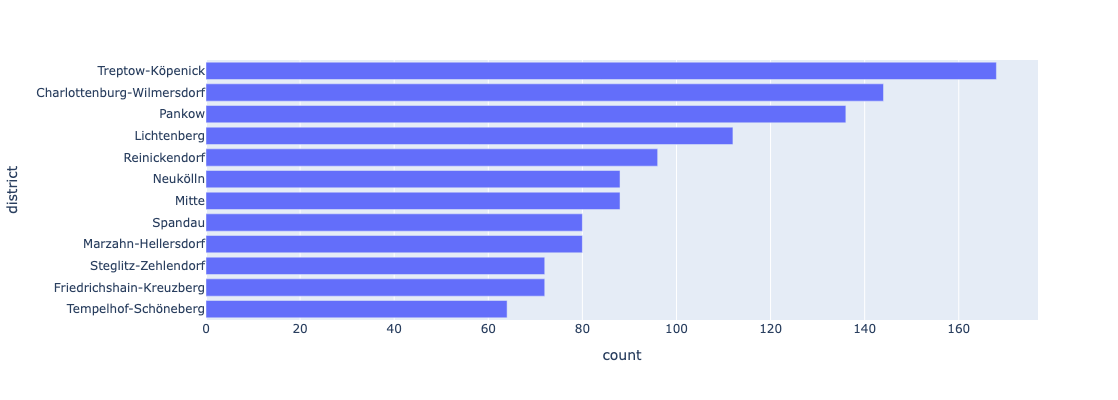

In [62]:
# Most frequently occurring districts
district_count = df['district'].value_counts().sort_values(ascending=True)
fig = px.bar(district_count, x='count', hover_data=['count'], orientation='h', color_discrete_sequence=colors)
fig.update_layout(autosize=True, height=400)
fig.show()

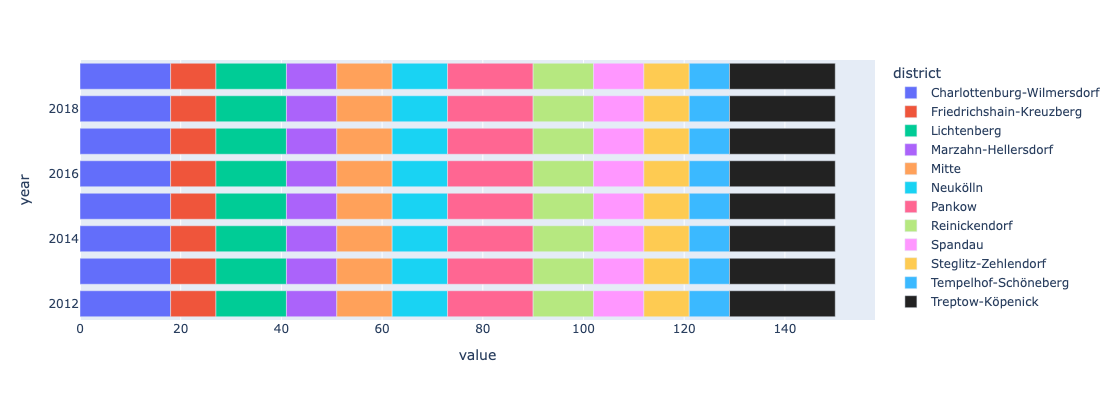

In [63]:
yearly_district_count = df.groupby('year', observed=False)['district'].value_counts().unstack()
fig = px.bar(yearly_district_count, orientation='h', color_discrete_sequence=colors, height=400)
fig.update_layout(autosize=True)
fig.show()

In [64]:
# Most frequently occurring locations
largest_location_count = df['location'].value_counts().nlargest()
largest_location_count

location
Tiergarten Süd       8
Plänterwald          8
Johannisthal         8
Oberschöneweide      8
Niederschöneweide    8
Name: count, dtype: int64

In [65]:
smallest_location_count = df['location'].value_counts().nsmallest()
smallest_location_count

location
Tiergarten Süd       8
Plänterwald          8
Johannisthal         8
Oberschöneweide      8
Niederschöneweide    8
Name: count, dtype: int64

All the locations have equal frequencies.

#### Distribution of the Crimes

Distribution of the crimes between 2012 and 2019

In [66]:
crime_data = df.copy().select_dtypes('int64').iloc[:, 2:-1]
crime_data.head()

robbery  street_robbery  injury  agg_assault  threat  theft  car  from_car  \
0       70              46     586          194     118   2263   18       328   
1       65              29     474          123     142   3203   10       307   
2      242             136    1541          454     304   8988   81       792   
3       52              25     254           60      66   1916   86       192   
4      130              51     629          185     199   2470   94       410   

   bike  burglary  fire  arson  damage  graffiti  drugs  local  
0   120        68    16      4     273        26    171   1032  
1   170        37    10      4     380       124     98    870  
2   822       275    49     27    1538       522    435   3108  
3   396       131    14      5     428       122    213    752  
4   325       161    42     22     516        64    259   1403

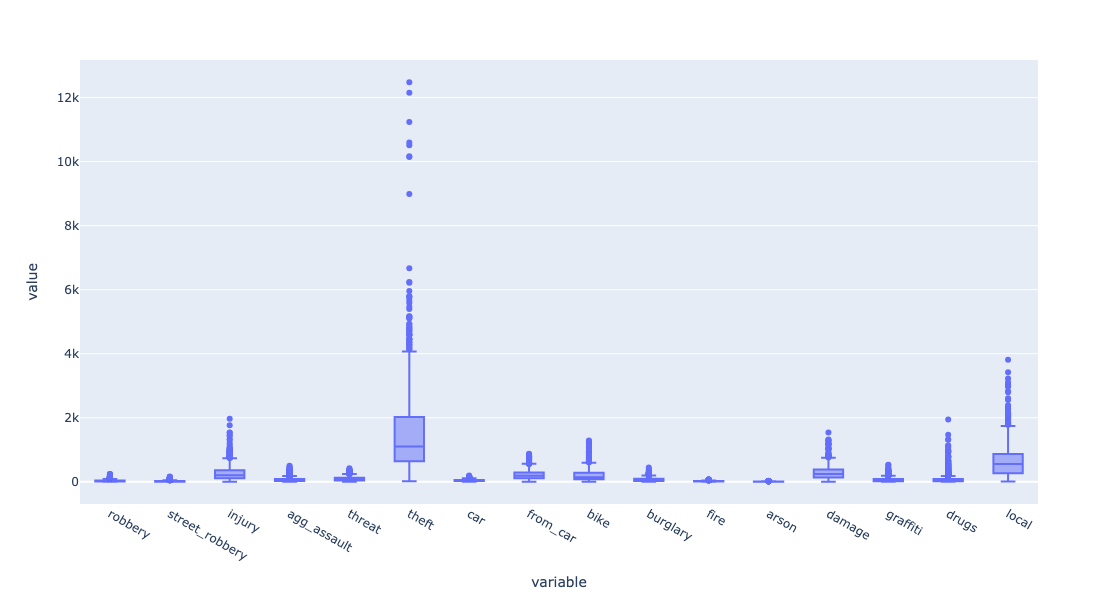

In [67]:
fig = px.box(crime_data)
fig.update_layout(autosize=True, height=600)
fig.show()

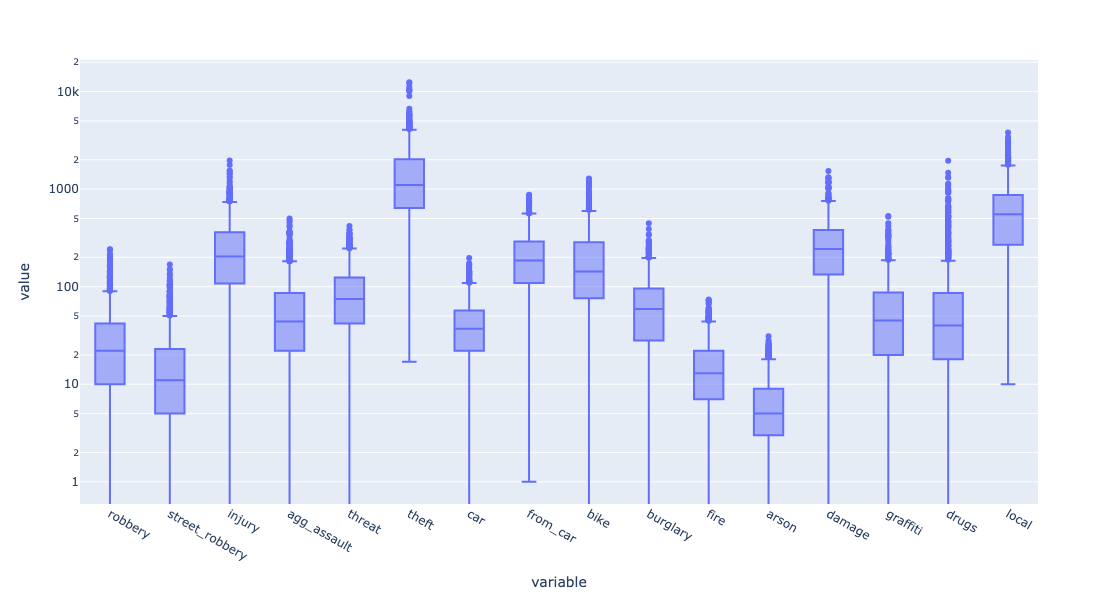

In [68]:
fig = px.box(crime_data, log_y=True)
fig.update_layout(autosize=True, height=600)
fig.show()

Observation

- Theft and local crimes are the most prevalent crimes with outliers in specific locations or years.

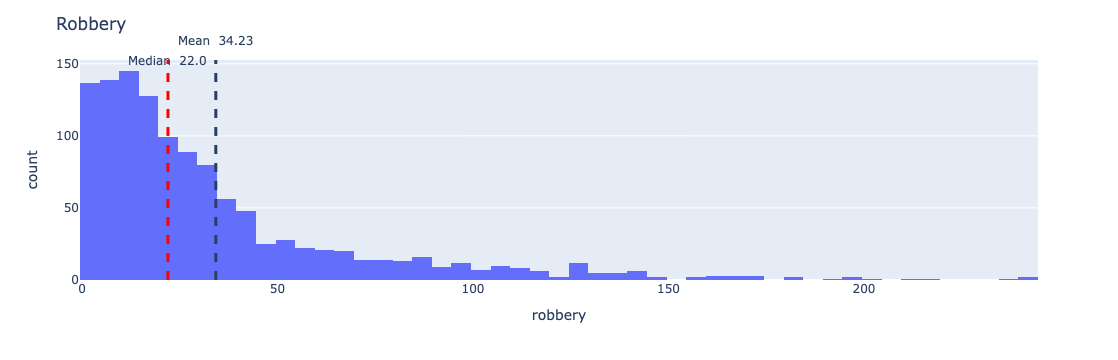

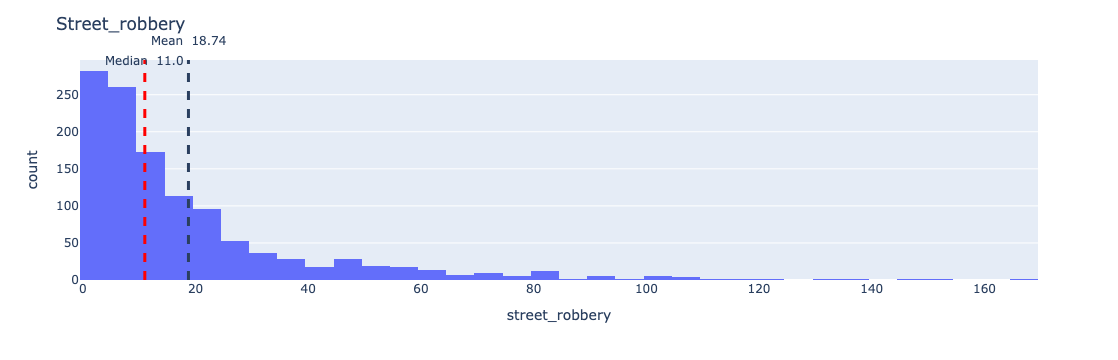

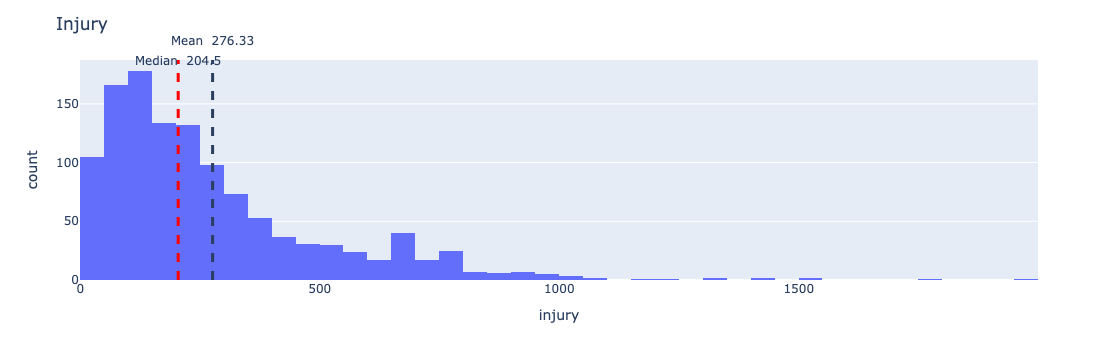

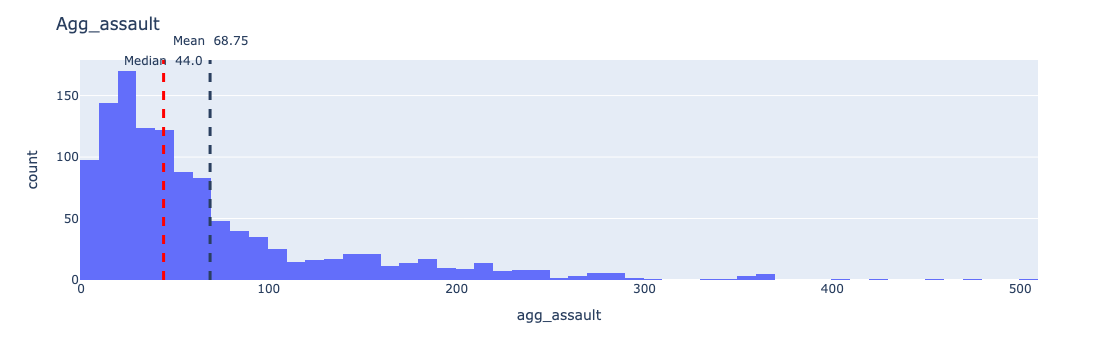

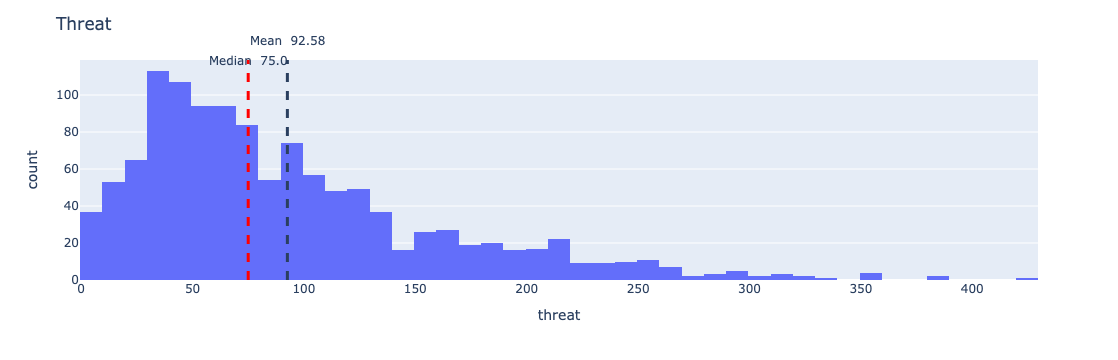

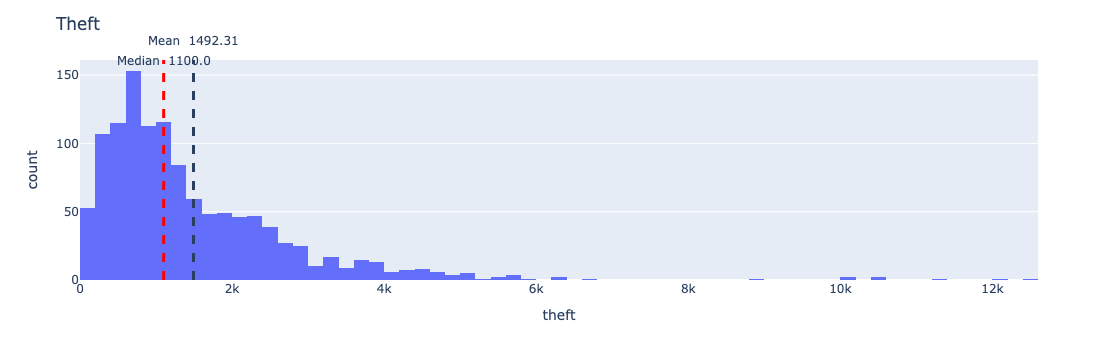

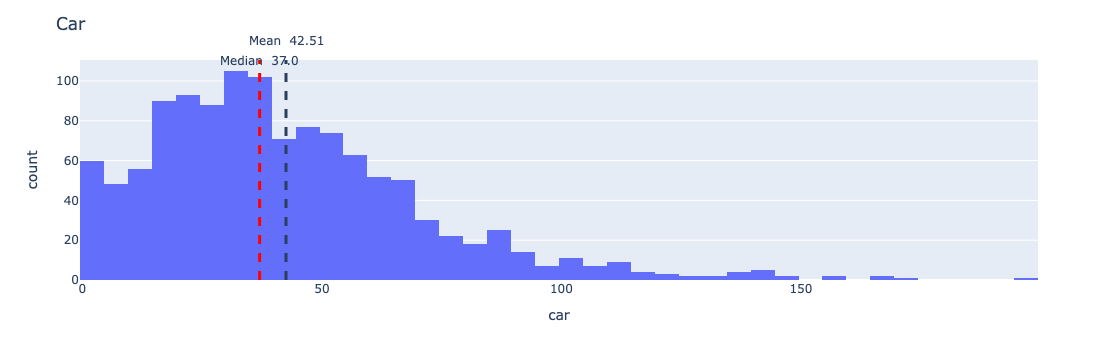

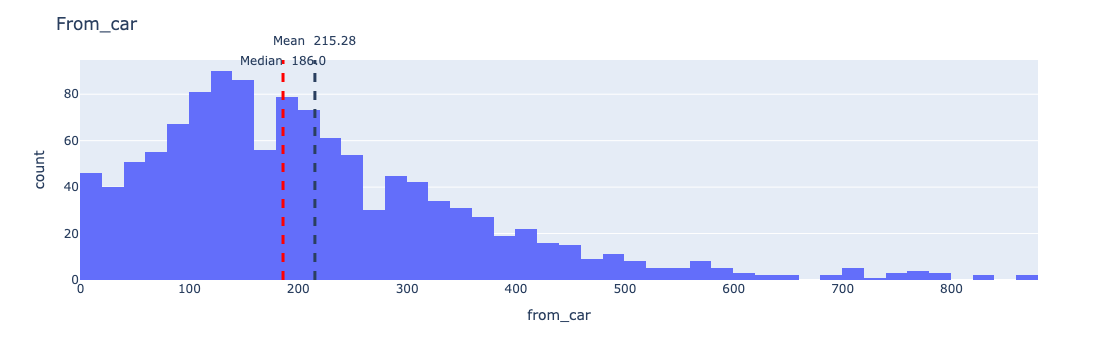

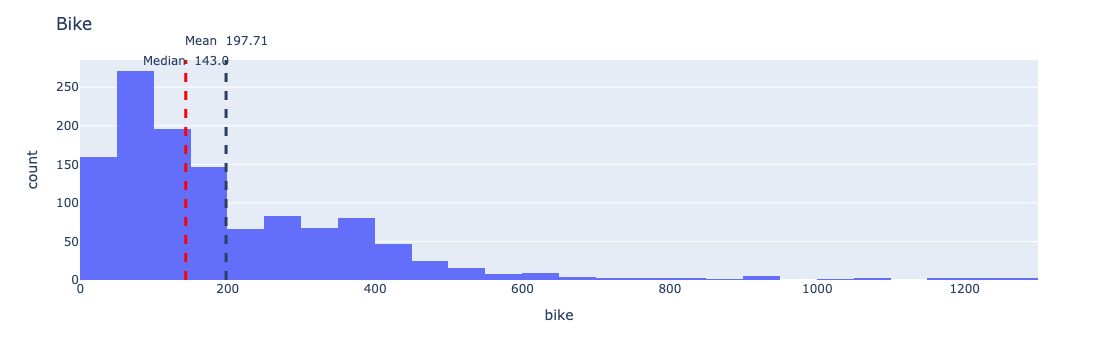

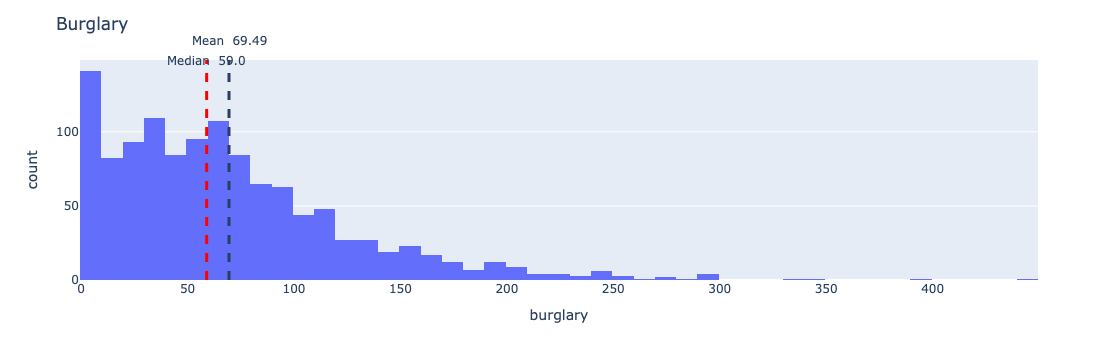

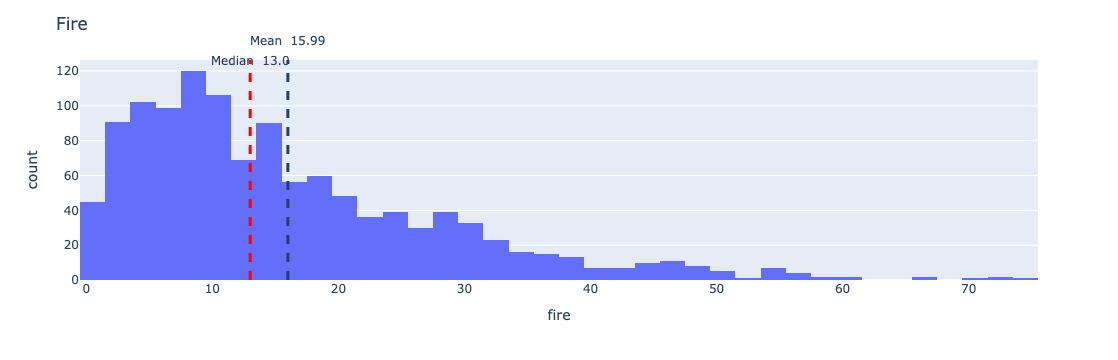

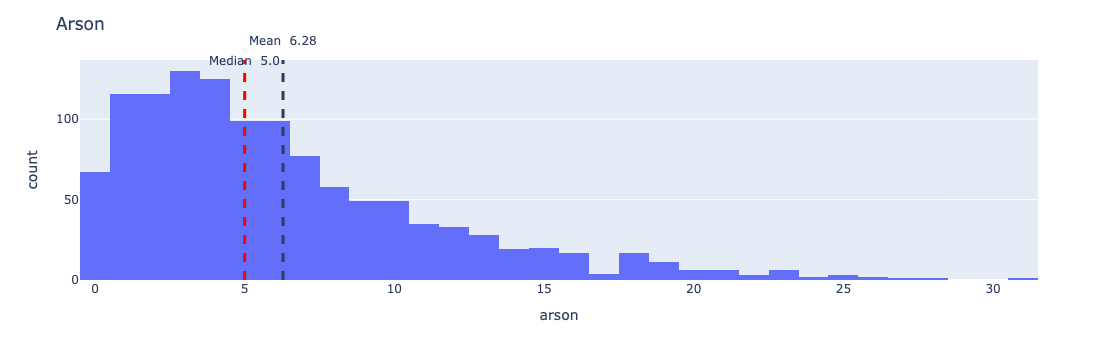

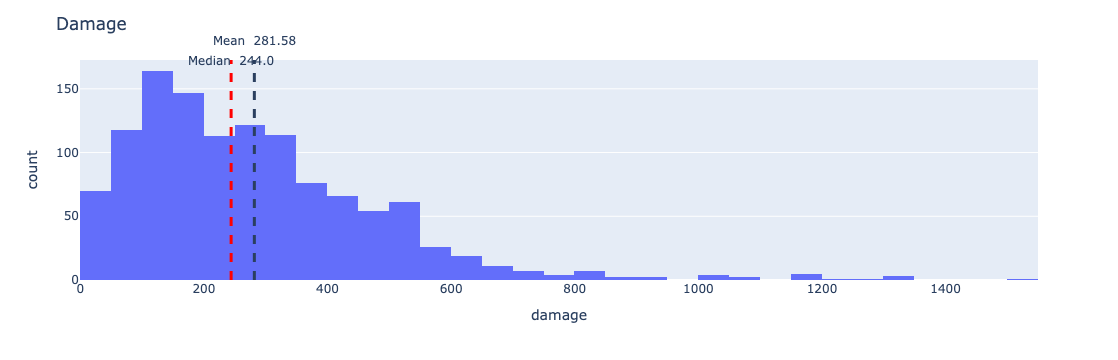

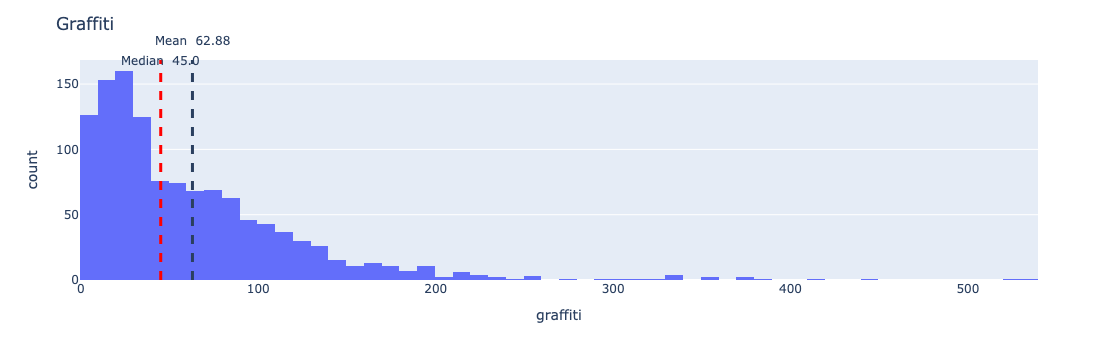

In [69]:
for crime in crime_data.columns:
    fig = px.histogram(crime_data, x=crime)
    fig.update_layout(title=crime.capitalize())
    mean = crime_data[crime].mean()
    median = crime_data[crime].median()
    fig.add_vline(x=mean, line_width=3, line_dash='dash', 
                  annotation=dict(text=f'Mean \n{round(mean, 2)}', yshift=10), 
                  annotation_position="top")
    fig.add_vline(x=median, line_width=3, line_dash='dash', line_color="red", 
                  annotation=dict(text=f'Median \n{round(median, 2)}', yshift=-10), 
                  annotation_position="top")
    fig.show()

Observations:
- The concentration of the data is on the left side of the distribution, which means specific locations had more crimes than the average.
- The median is on the left side of the mean. The median may be a better representation for finding the center of the distribution.
- Local crime is right-skewed but has a double-peak.

robbery           0.009418
street_robbery    0.005157
injury            0.076022
agg_assault       0.018914
threat            0.025470
theft             0.410545
car               0.011694
from_car          0.059224
bike              0.054391
burglary          0.019117
fire              0.004399
arson             0.001728
damage            0.077465
graffiti          0.017300
drugs             0.026922
local             0.182236
dtype: float64


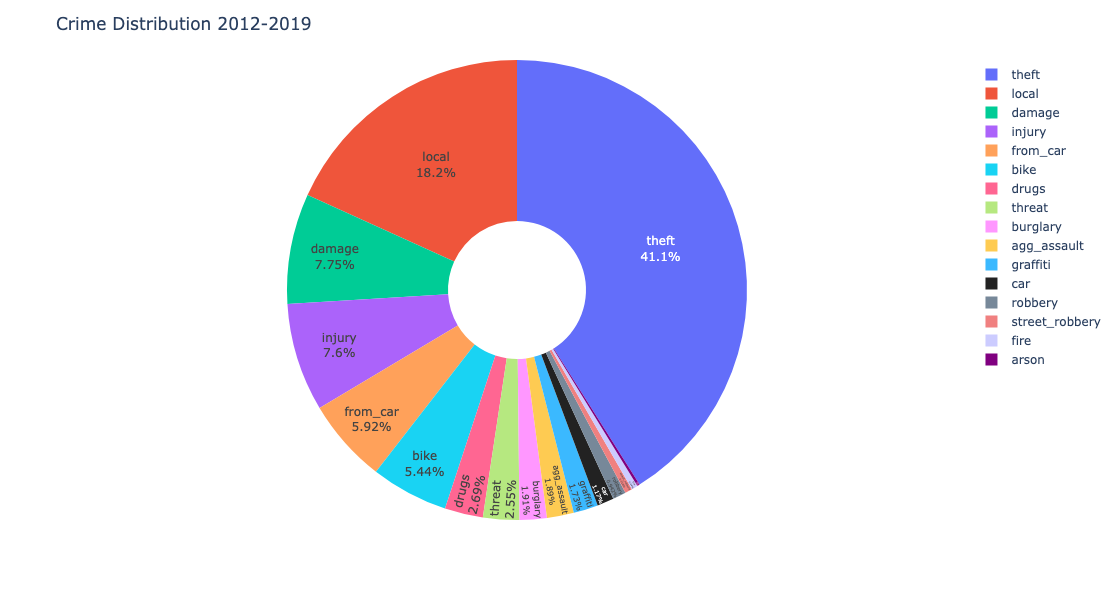

In [70]:
perc_crime_distribution = crime_data.sum(axis=0) / crime_data.sum().sum()
print(perc_crime_distribution)
fig = px.pie(crime_data, values=perc_crime_distribution, names=crime_data.columns, hole=.3, color_discrete_sequence=colors)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Crime Distribution 2012-2019', height=600, autosize=True)
fig.show()

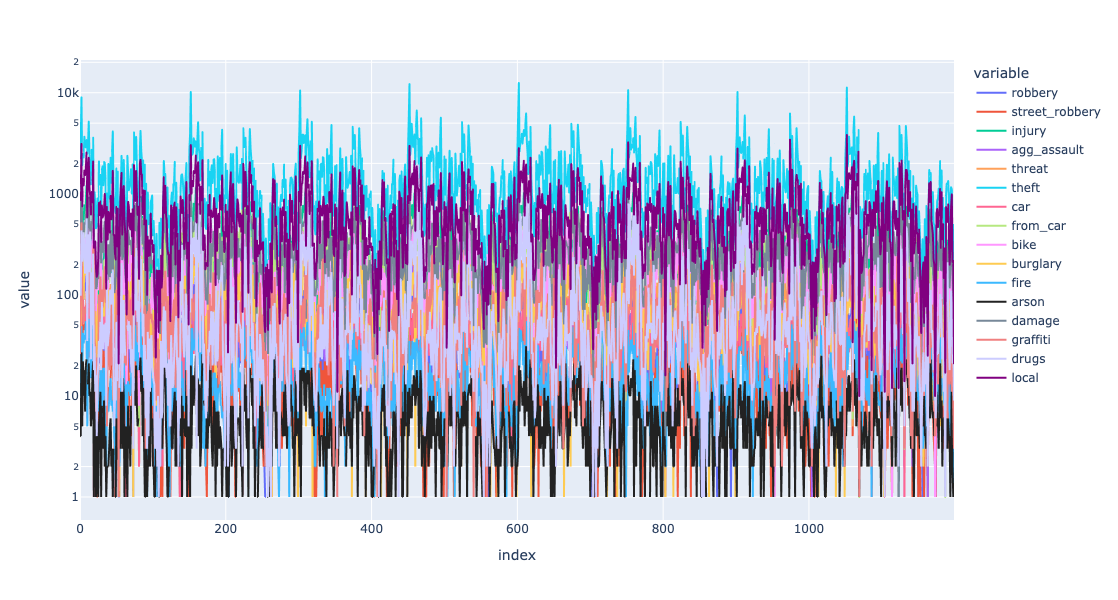

In [71]:
fig = px.line(crime_data, log_y=True, color_discrete_sequence=colors)
fig.update_layout(height=600, autosize=True)
fig.show()

#### Yearly Total Crime Count between 2012 - 2019

In [72]:
total_yearly_crimes = df.copy().groupby('year')[crime_data.columns].sum()
total_yearly_crimes

robbery  street_robbery  injury  agg_assault  threat   theft   car  \
year                                                                       
2012     6283            2886   42153        11032   14196  207340  5732   
2013     6088            3135   41461        10247   14333  220417  6628   
2014     5583            3228   39190         9515   13733  229955  6629   
2015     5318            2914   39312         9664   13260  251366  6649   
2016     5046            2962   41339        10024   13557  251192  7305   
2017     4165            2324   42283        10608   13452  220220  6642   
2018     4202            2417   42828        10656   13965  209957  5671   
2019     4395            2627   43035        10754   14604  200322  5751   

      from_car   bike  burglary  fire  arson  damage  graffiti  drugs   local  
year                                                                           
2012     30503  25836     12285  2514    904   48582     11070  11687  101472  
2013     35652  26389     11563  2561    972   43176      9573  12746  101063  
2014     36032  30434     12149  2322    908   40678      8166  12878   97700  
2015     34741  31937     11805  2103    834   39841      8471  15176  100220  
2016     34515  34136     11487  2529   1032   41768      9015  14407  100073  
2017     32308  30082      8572  2210    872   40985     10428  15503   95027  
2018     28677  29978      7568  2334    886   39883      9103  16700   97763  
2019     25902  28456      7958  2616   1130   42986      9635  18334  101581

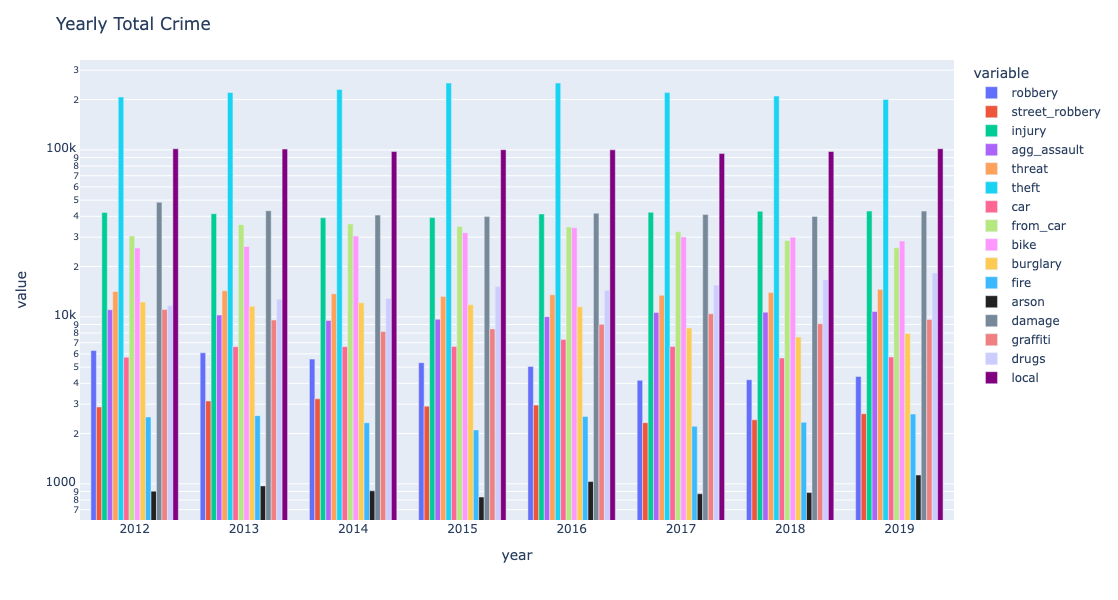

In [73]:
fig = px.bar(total_yearly_crimes, barmode='group', log_y=True, color_discrete_sequence=colors)
fig.update_layout(title_text='Yearly Total Crime', height=600, autosize=True)
fig.show()

#### Yearly Total Crime Counts

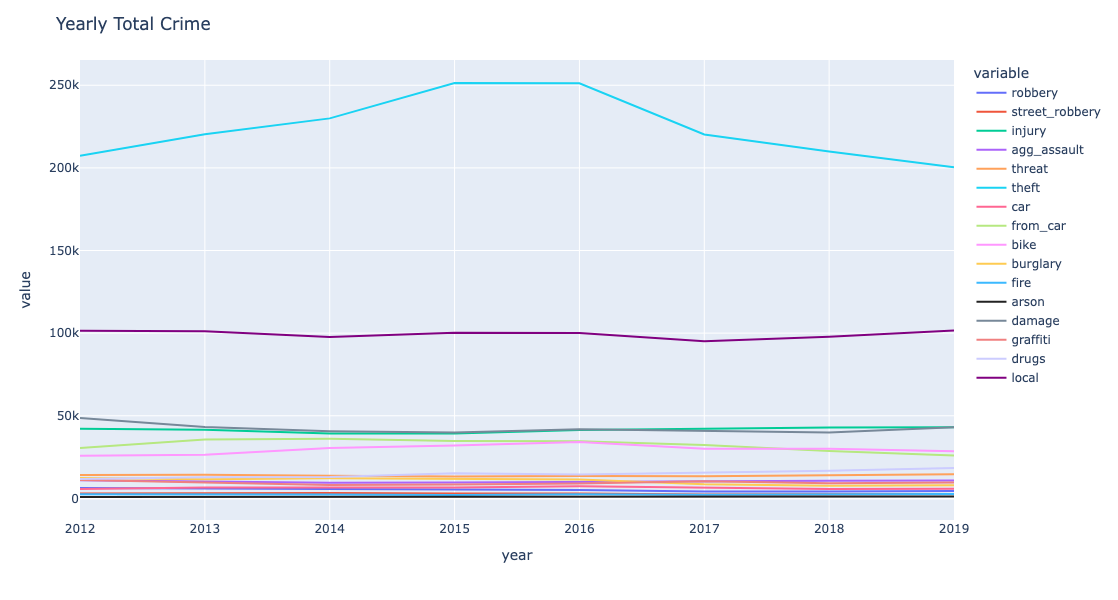

In [74]:
fig = px.line(total_yearly_crimes, color_discrete_sequence=colors)
fig.update_layout(title_text='Yearly Total Crime', height=600)
fig.show()

The theft and local makes the other variables less visible

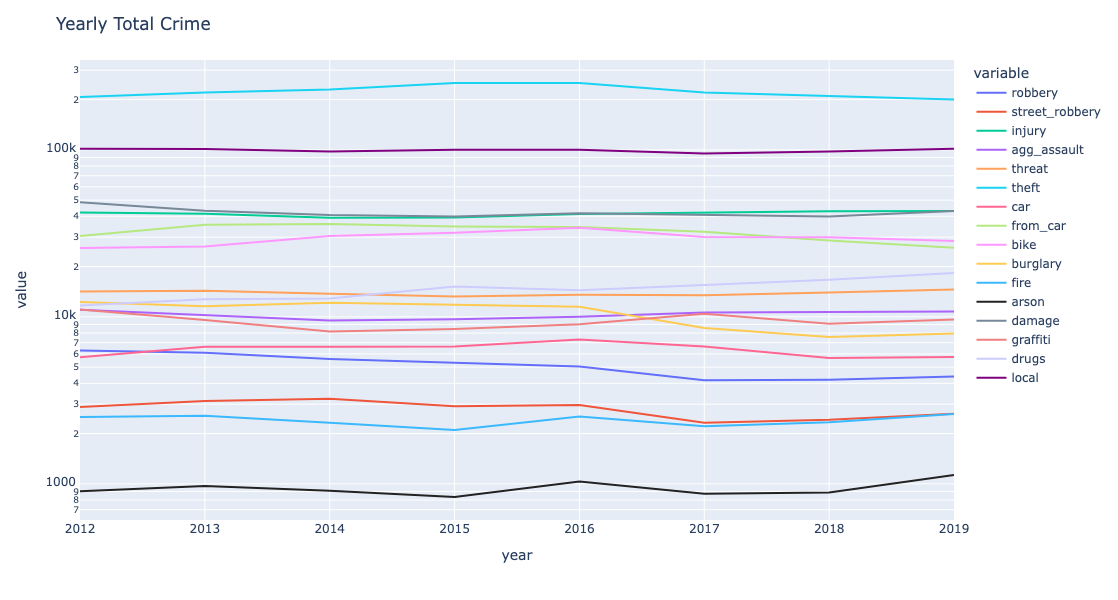

In [75]:
fig = px.line(total_yearly_crimes, log_y=True, color_discrete_sequence=colors)
fig.update_layout(title_text='Yearly Total Crime', height=600, autosize=True)
fig.show()

Much better but this looks like a wave. I cannot see the trend.

#### Feature Normalization

In [76]:
data_feature_norm = (total_yearly_crimes - total_yearly_crimes.mean()) / total_yearly_crimes.std()
data_feature_norm.head()

robbery  street_robbery    injury  agg_assault    threat     theft  \
year                                                                        
2012  1.382428        0.228110  0.475575     1.325671  0.659970 -0.858758   
2013  1.147608        0.991797  0.007358    -0.120683  0.953052 -0.178406   
2014  0.539484        1.277030 -1.529233    -1.469386 -0.330520  0.317824   
2015  0.220370        0.313986 -1.446686    -1.194855 -1.342402  1.431766   
2016 -0.107174        0.461203 -0.075189    -0.531558 -0.707034  1.422713   

           car  from_car      bike  burglary      fire     arson    damage  \
year                                                                         
2012 -1.090972 -0.489774 -1.389984  0.923565  0.627096 -0.392014  2.219474   
2013  0.427197  0.920457 -1.188764  0.565376  0.882555  0.304900  0.328349   
2014  0.428891  1.024533  0.283091  0.856094 -0.416479 -0.351019 -0.545500   
2015  0.462779  0.670948  0.829988  0.685433 -1.606807 -1.109425 -0.838299   
2016  1.574296  0.609050  1.630138  0.527672  0.708626  0.919824 -0.164197   

      graffiti     drugs     local  
year                                
2012  1.693391 -1.350105  0.909978  
2013  0.145177 -0.872223  0.733558  
2014 -1.309957 -0.812657 -0.717059  
2015 -0.994523  0.224331  0.369933  
2016 -0.431912 -0.122685  0.306525

In [77]:
data_feature_norm.describe()

robbery  street_robbery    injury   agg_assault        threat  \
count  8.000000e+00        8.000000  8.000000  8.000000e+00  8.000000e+00   
mean  -5.551115e-17        0.000000  0.000000  2.775558e-17 -2.775558e-17   
std    1.000000e+00        1.000000  1.000000  1.000000e+00  1.000000e+00   
min   -1.168079e+00       -1.495555 -1.529233 -1.469386e+00 -1.342402e+00   
25%   -9.492151e-01       -0.727267 -0.418063 -6.973824e-01 -7.631903e-01   
50%    5.659766e-02        0.271048  0.241467  2.118863e-01 -8.236252e-02   
75%    6.915151e-01        0.593852  0.655724  6.780363e-01  7.332403e-01   
max    1.382428e+00        1.277030  1.072349  1.325671e+00  1.532799e+00   

          theft           car  from_car          bike  burglary      fire  \
count  8.000000  8.000000e+00  8.000000  8.000000e+00  8.000000  8.000000   
mean   0.000000  4.163336e-17  0.000000 -5.551115e-17  0.000000  0.000000   
std    1.000000  1.000000e+00  1.000000  1.000000e+00  1.000000  1.000000   
min   -1.223880 -1.194330e+00 -1.749915 -1.389984e+00 -1.416571 -1.606807   
25%   -0.756642 -1.066827e+00 -0.614802 -6.246741e-01 -0.994632 -0.568667   
50%   -0.183530  4.280441e-01  0.306819  1.360874e-01  0.546524  0.137920   
75%    0.594046  4.538834e-01  0.733325  4.198152e-01  0.728099  0.752108   
max    1.431766  1.574296e+00  1.024533  1.630138e+00  0.923565  1.181496   

              arson    damage      graffiti         drugs         local  
count  8.000000e+00  8.000000  8.000000e+00  8.000000e+00  8.000000e+00  
mean   2.775558e-17  0.000000 -2.081668e-17  5.551115e-17 -2.775558e-17  
std    1.000000e+00  1.000000  1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.109425e+00 -0.838299 -1.309957e+00 -1.350105e+00 -1.870046e+00  
25%   -6.123617e-01 -0.615027 -5.725649e-01 -8.275489e-01 -6.966776e-01  
50%   -3.715165e-01 -0.301151 -9.786218e-02  5.082282e-02  3.382291e-01  
75%    4.586307e-01  0.278500  4.143306e-01  5.069308e-01  7.776627e-01  
max    1.924199e+00  2.219474  1.693391e+00  1.649401e+00  9.569948e-01

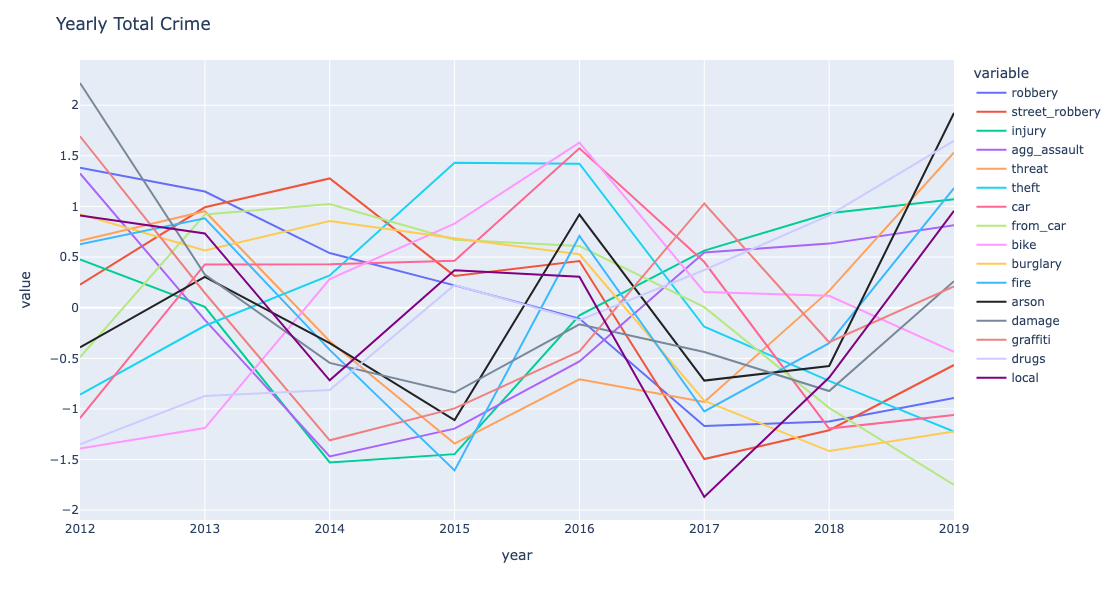

In [78]:
fig = px.line(data_feature_norm, color_discrete_sequence=colors)
fig.update_layout(title_text='Yearly Total Crime', height=600, autosize=True)
fig.show()

Observation
- The graph looks like a zigzag. There are variations in the data over time.
- Some crimes have a sharp increase or decrease in certain years while others go in the opposite direction. For example, In 2017, all other crimes seem to have dropped except graffiti and aggravated assault.
- What could have happened to cause the sharp decrease in crimes in 2017?
- The increase in crimes from 2015 to 2016?

#### Median-Average Yearly Crime

In [79]:
median_yearly_crimes = df.copy().groupby('year')[crime_data.columns].median()
median_yearly_crimes

robbery  street_robbery  injury  agg_assault  threat   theft   car  \
year                                                                       
2012     26.0            10.5   213.0         49.5    76.0  1113.5  34.0   
2013     25.5            11.5   205.0         44.0    74.5  1175.0  37.5   
2014     25.0            13.5   168.0         38.5    74.0  1166.5  39.5   
2015     22.0            11.0   188.5         40.0    66.0  1191.5  39.5   
2016     22.0            11.0   205.5         43.0    76.5  1202.5  41.0   
2017     19.5            10.0   202.5         46.5    69.0  1052.5  39.0   
2018     19.0             9.5   208.5         49.0    77.0  1032.0  34.0   
2019     19.5            10.0   223.5         49.0    80.0   951.0  37.5   

      from_car   bike  burglary  fire  arson  damage  graffiti  drugs  local  
year                                                                          
2012     187.0  131.0      67.0  11.5    4.0   282.0      62.0   33.5  600.5  
2013     209.0  143.5      63.0  14.0    5.0   235.0      46.0   33.0  588.5  
2014     211.5  149.5      67.0  11.0    5.0   223.0      38.0   40.0  547.5  
2015     200.0  144.5      67.0  11.0    4.0   221.5      39.0   37.0  544.0  
2016     195.5  160.5      68.0  14.0    5.0   231.0      35.5   38.5  560.0  
2017     179.5  136.0      54.5  11.0    5.0   241.5      52.0   40.0  534.0  
2018     152.5  131.0      44.5  14.0    5.0   237.0      42.5   47.5  507.0  
2019     146.0  123.5      45.0  14.0    6.0   252.0      40.0   45.0  573.0

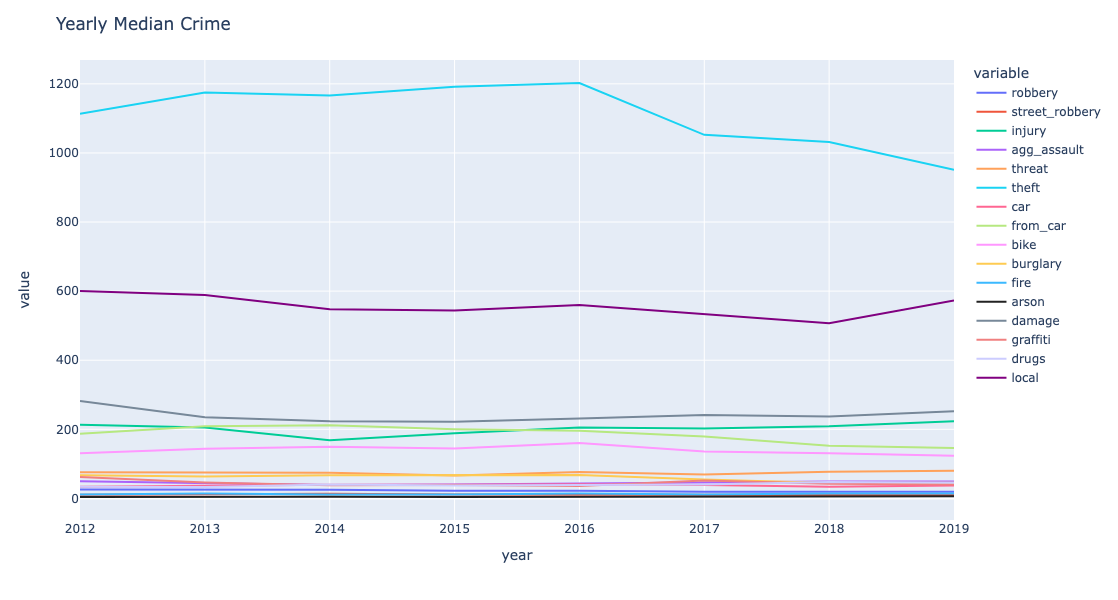

In [80]:
fig = px.line(median_yearly_crimes, color_discrete_sequence=colors)
fig.update_layout(title_text='Yearly Median Crime', height=600, autosize=True)
fig.show()

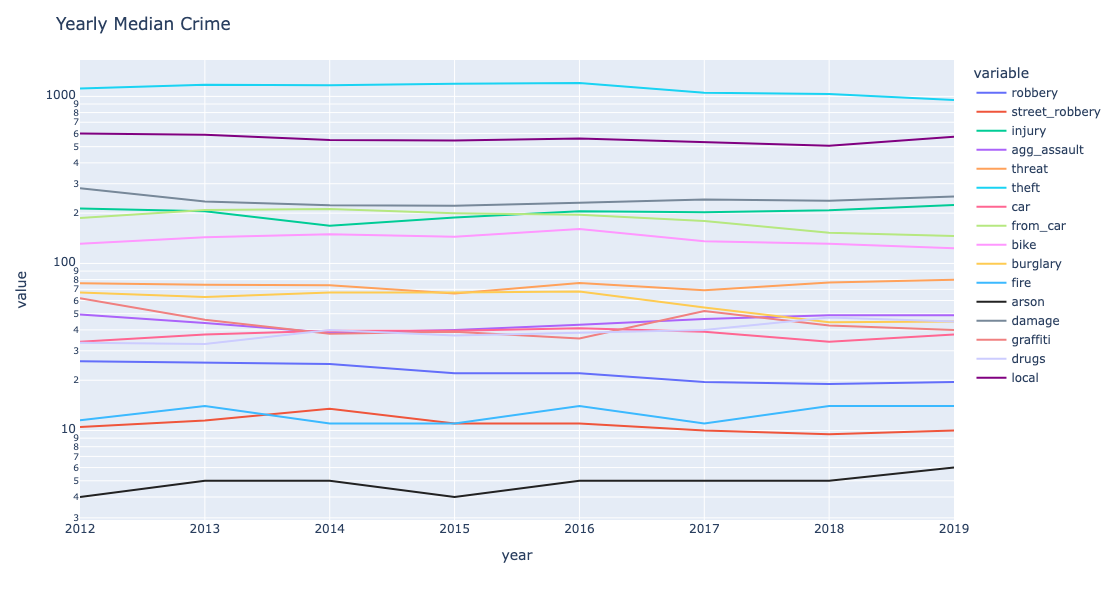

In [81]:
fig = px.line(median_yearly_crimes, color_discrete_sequence=colors, log_y=True)
fig.update_layout(title_text='Yearly Median Crime', height=600, autosize=True)
fig.show()

### Yearly Crime Growth Rate for each crime

In [102]:
df.head()

year district   code           location  robbery  street_robbery  injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   agg_assault  threat  theft  car  from_car  bike  burglary  fire  arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   damage  graffiti  drugs  local  total_crime_count  median_crime_count  
0     273        26    171   1032               5333               119.0  
1     380       124     98    870               6046               123.5  
2    1538       522    435   3108              19314               444.5  
3     428       122    213    752               4712               126.5  
4     516        64    259   1403               6960               192.0

In [109]:
df_growth_rate = df.copy().iloc[:, [0] + list(range(4, df.shape[1]-2))].groupby('year').sum()
df_growth_rate.head()

robbery  street_robbery  injury  agg_assault  threat   theft   car  \
year                                                                       
2012     6283            2886   42153        11032   14196  207340  5732   
2013     6088            3135   41461        10247   14333  220417  6628   
2014     5583            3228   39190         9515   13733  229955  6629   
2015     5318            2914   39312         9664   13260  251366  6649   
2016     5046            2962   41339        10024   13557  251192  7305   

      from_car   bike  burglary  fire  arson  damage  graffiti  drugs   local  
year                                                                           
2012     30503  25836     12285  2514    904   48582     11070  11687  101472  
2013     35652  26389     11563  2561    972   43176      9573  12746  101063  
2014     36032  30434     12149  2322    908   40678      8166  12878   97700  
2015     34741  31937     11805  2103    834   39841      8471  15176  100220  
2016     34515  34136     11487  2529   1032   41768      9015  14407  100073

In [110]:
growth_rate = df_growth_rate.pct_change() * 100.0
growth_rate

robbery  street_robbery    injury  agg_assault    threat      theft  \
year                                                                          
2012        NaN             NaN       NaN          NaN       NaN        NaN   
2013  -3.103613        8.627859 -1.641639    -7.115664  0.965061   6.307032   
2014  -8.295007        2.966507 -5.477437    -7.143554 -4.186144   4.327252   
2015  -4.746552       -9.727385  0.311304     1.565949 -3.444258   9.310952   
2016  -5.114705        1.647220  5.156186     3.725166  2.239819  -0.069222   
2017 -17.459374      -21.539500  2.283558     5.826018 -0.774508 -12.330011   
2018   0.888355        4.001721  1.288934     0.452489  3.813559  -4.660340   
2019   4.593051        8.688457  0.483329     0.919670  4.575725  -4.589035   

            car   from_car       bike   burglary       fire      arson  \
year                                                                     
2012        NaN        NaN        NaN        NaN        NaN        NaN   
2013  15.631542  16.880307   2.140424  -5.877086   1.869531   7.522124   
2014   0.015088   1.065859  15.328357   5.067889  -9.332292  -6.584362   
2015   0.301705  -3.582926   4.938556  -2.831509  -9.431525  -8.149780   
2016   9.866145  -0.650528   6.885431  -2.693774  20.256776  23.741007   
2017  -9.075975  -6.394321 -11.876025 -25.376513 -12.613681 -15.503876   
2018 -14.619091 -11.238702  -0.345722 -11.712552   5.610860   1.605505   
2019   1.410686  -9.676744  -5.077057   5.153277  12.082262  27.539503   

         damage   graffiti      drugs     local  
year                                             
2012        NaN        NaN        NaN       NaN  
2013 -11.127578 -13.523035   9.061350 -0.403067  
2014  -5.785622 -14.697587   1.035619 -3.327627  
2015  -2.057623   3.734999  17.844386  2.579324  
2016   4.836726   6.421910  -5.067211 -0.146677  
2017  -1.874641  15.673877   7.607413 -5.042319  
2018  -2.688789 -12.706176   7.721086  2.879182  
2019   7.780257   5.844227   9.784431  3.905363

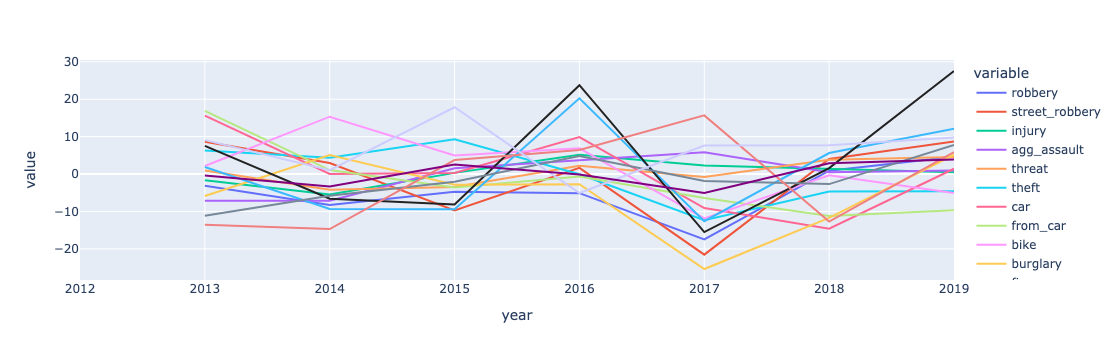

In [112]:
fig = px.line(growth_rate, x=growth_rate.index, y=growth_rate.columns, color_discrete_sequence=colors)
fig.show()

Observation:
- There is a zig-zag pattern in the rate of change in most crimes.
- Arson has the highest upward rate of change from 2018 to 2019. There is a significant increase from 2015-2016 and a significant drop from 2016-2017.
- Was there a policy change that made this the case?
- The theft from the car is relatively stable. Is it difficult to steal from cars?
- Fire and Arson have a similar trajectory
- There have been many thefts over the course of the years, with a sharp drop from 2015 to 2017.
- There was a considerable drop in the crime rate in 2017. Was there a policy change that made this the case?

#### Most dangerous part of Berlin

In [113]:
df.head()

year district   code           location  robbery  street_robbery  injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   agg_assault  threat  theft  car  from_car  bike  burglary  fire  arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   damage  graffiti  drugs  local  total_crime_count  median_crime_count  
0     273        26    171   1032               5333               119.0  
1     380       124     98    870               6046               123.5  
2    1538       522    435   3108              19314               444.5  
3     428       122    213    752               4712               126.5  
4     516        64    259   1403               6960               192.0

In [118]:
sum_crimes_district = df.copy().groupby('district', observed=False)[crime_data.columns].sum()
sum_crimes_district

robbery  street_robbery  injury  agg_assault  \
district                                                                   
Charlottenburg-Wilmersdorf     4220            2039   31931         7797   
Friedrichshain-Kreuzberg       6748            4310   37719        12220   
Lichtenberg                    1890            1057   21001         4525   
Marzahn-Hellersdorf            1981            1090   24198         4576   
Mitte                          7582            4225   59628        15730   
Neukölln                       4659            2545   32239         9261   
Pankow                         2581            1304   23057         5409   
Reinickendorf                  2385            1171   22514         5333   
Spandau                        2314            1193   22670         5318   
Steglitz-Zehlendorf            1624             794   13871         2720   
Tempelhof-Schöneberg           3525            1906   25880         5930   
Treptow-Köpenick               1571             859   16893         3681   

                            threat   theft   car  from_car   bike  burglary  \
district                                                                      
Charlottenburg-Wilmersdorf   11380  210033  5821     32476  26447     10606   
Friedrichshain-Kreuzberg      9244  213388  3667     22486  32462      6605   
Lichtenberg                   6431   99402  5251     17003  13868      4445   
Marzahn-Hellersdorf           7330   76041  4500     13861   8295      3735   
Mitte                        17130  328450  4186     34665  33574      9915   
Neukölln                     11477  161622  4083     25428  15568      8861   
Pankow                        8165  167927  5732     22013  34665      7911   
Reinickendorf                 9137   99013  2754     18202   9876      6784   
Spandau                       8378   89812  2590     13146   8555      4396   
Steglitz-Zehlendorf           6476  101487  3901     19679  16389      8247   
Tempelhof-Schöneberg          9872  153141  4281     23861  20791      7536   
Treptow-Köpenick              6080   90453  4241     15510  16758      4346   

                            fire  arson  damage  graffiti  drugs   local  
district                                                                  
Charlottenburg-Wilmersdorf  1313    593   29329      6364   8425   80844  
Friedrichshain-Kreuzberg    2072    741   40089     10108  31683   88644  
Lichtenberg                 1439    572   22543      5046   3530   48782  
Marzahn-Hellersdorf         1651    532   22738      4714   3086   48691  
Mitte                       2372    900   45457     10982  26445  126407  
Neukölln                    1903    854   32975      5321  12253   82737  
Pankow                      1654    661   33486      9701   4832   69960  
Reinickendorf               1354    516   20899      4022   7300   52325  
Spandau                     1348    544   20004      2796   4163   52355  
Steglitz-Zehlendorf         1144    431   20879      5108   3116   37167  
Tempelhof-Schöneberg        1665    602   27722      5723   8965   67059  
Treptow-Köpenick            1274    592   21778      5576   3633   39928

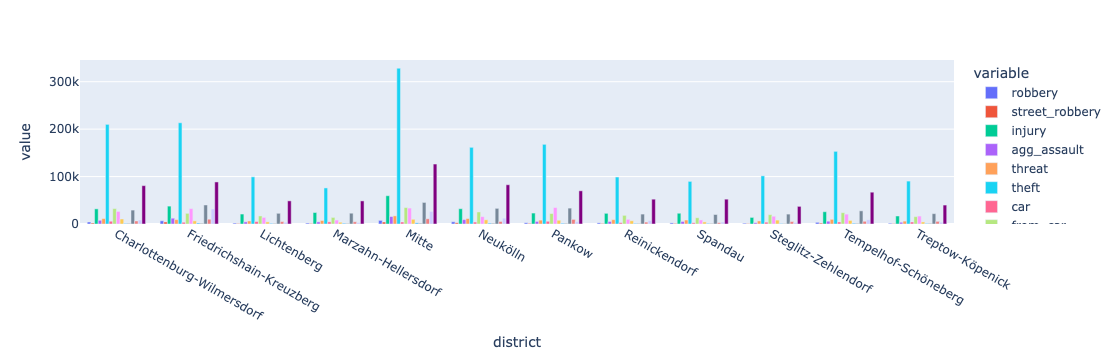

In [132]:
fig = px.bar(sum_crimes_district, x=sum_crimes_district.index, 
             barmode='group',
             y=sum_crimes_district.columns, 
             color_discrete_sequence=colors)
fig.show()

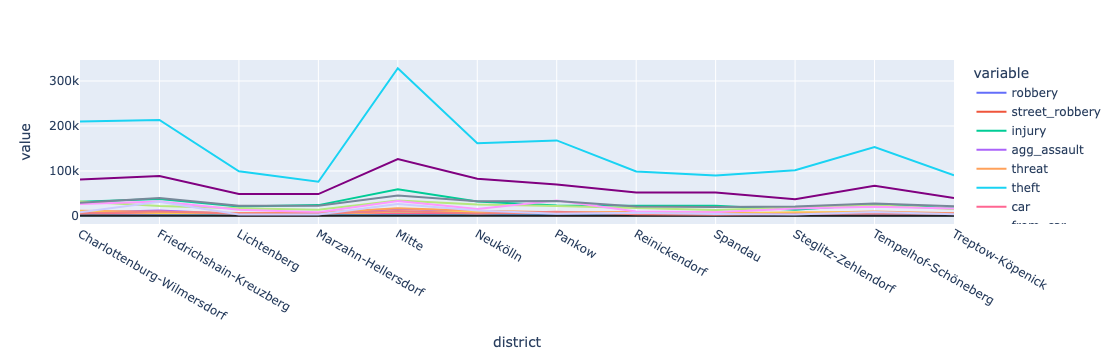

In [124]:
fig = px.line(sum_crimes_district, x=sum_crimes_district.index, 
             barmode='group',
             y=sum_crimes_district.columns, 
             color_discrete_sequence=colors)
fig.show()

In [120]:
median_crimes_district = df.copy().groupby('district', observed=False)[crime_data.columns].median()
median_crimes_district

robbery  street_robbery  injury  agg_assault  \
district                                                                   
Charlottenburg-Wilmersdorf     25.5            11.0   198.5         42.5   
Friedrichshain-Kreuzberg       97.0            62.5   524.0        183.0   
Lichtenberg                    16.0             9.0   165.5         37.0   
Marzahn-Hellersdorf            20.0            11.0   262.0         45.0   
Mitte                          78.0            45.0   652.0        162.5   
Neukölln                       47.5            30.0   356.0         92.5   
Pankow                         16.0             8.0   157.0         34.5   
Reinickendorf                  21.0            10.0   208.0         52.5   
Spandau                        20.0            10.0   172.5         42.5   
Steglitz-Zehlendorf            19.5            10.0   199.5         40.0   
Tempelhof-Schöneberg           40.0            22.0   342.0         69.0   
Treptow-Köpenick                6.5             3.0    95.0         19.0   

                            threat   theft   car  from_car   bike  burglary  \
district                                                                      
Charlottenburg-Wilmersdorf    74.0  1084.5  37.0     214.0  171.0      71.0   
Friedrichshain-Kreuzberg     107.5  2803.5  47.5     237.5  372.0      74.0   
Lichtenberg                   56.0   796.0  48.0     131.0  101.0      35.5   
Marzahn-Hellersdorf           83.5   668.0  40.0     125.0   99.5      35.5   
Mitte                        204.0  2972.5  47.0     399.0  345.0     105.0   
Neukölln                     131.5  1828.0  44.0     287.5  160.0      93.5   
Pankow                        56.0  1152.0  38.5     160.0  258.5      59.0   
Reinickendorf                 80.5  1038.0  29.0     193.0   93.0      62.5   
Spandau                       73.0   905.5  33.0     152.5   75.5      54.5   
Steglitz-Zehlendorf           86.0  1312.0  51.5     243.5  222.0     104.5   
Tempelhof-Schöneberg         142.5  2145.5  67.0     376.0  276.5     118.5   
Treptow-Köpenick              32.5   451.0  20.0      82.5   80.5      21.5   

                            fire  arson  damage  graffiti  drugs   local  
district                                                                  
Charlottenburg-Wilmersdorf   8.0    3.0   198.5      30.0   42.5   529.0  
Friedrichshain-Kreuzberg    28.5   10.0   515.5     120.5  330.5  1116.0  
Lichtenberg                 12.0    5.0   191.5      31.5   26.0   367.5  
Marzahn-Hellersdorf         18.5    6.0   253.5      54.5   32.5   542.0  
Mitte                       29.0   10.0   478.0      92.0  231.0  1379.5  
Neukölln                    22.0    9.5   422.0      52.5   55.0  1044.0  
Pankow                      12.0    4.0   256.5      66.5   33.0   528.0  
Reinickendorf               10.0    4.0   207.5      31.5   60.5   430.0  
Spandau                     16.0    5.5   213.5      24.0   29.5   470.0  
Steglitz-Zehlendorf         15.0    5.0   297.5      54.0   42.0   537.5  
Tempelhof-Schöneberg        24.0    9.0   407.0      81.5   82.0   814.0  
Treptow-Köpenick             7.0    3.0   123.5      23.0   14.5   224.5

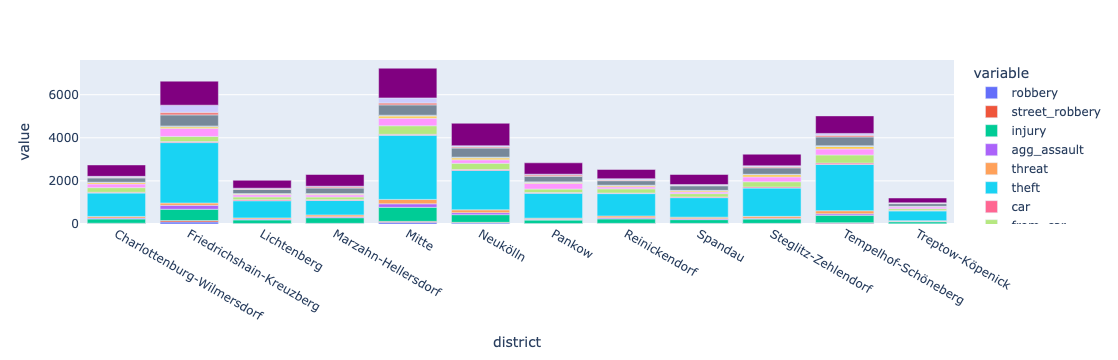

In [121]:
fig = px.bar(median_crimes_district, x=median_crimes_district.index, y=median_crimes_district.columns, color_discrete_sequence=colors)
fig.show()

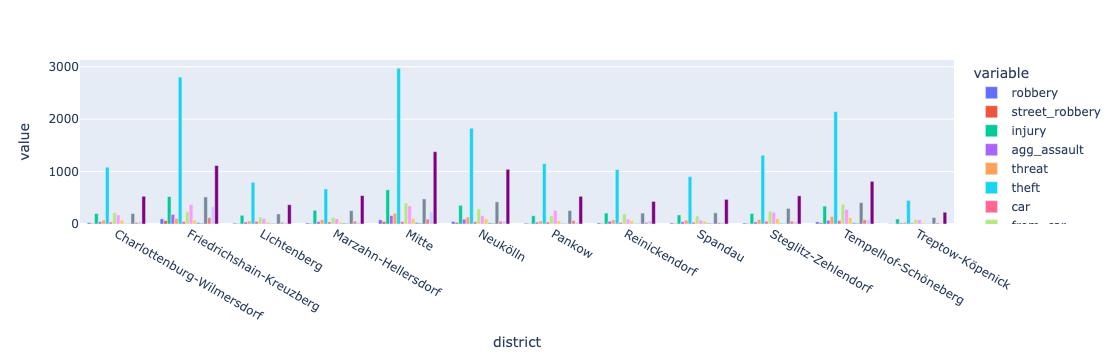

In [133]:
fig = px.bar(median_crimes_district, 
             barmode='group', 
             x=median_crimes_district.index, 
             y=median_crimes_district.columns, 
             color_discrete_sequence=colors)
fig.show()

### Folium based Map

In [83]:
import pgeocode

In [84]:
nomi = pgeocode.Nominatim('de')

In [135]:
x = df['code'].map(lambda x: nomi.query_postal_code(str(x))[['latitude', 'longitude']])

In [138]:
import geopy
from geopy.geocoders import Nominatim

In [142]:
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode("10113")
if location:
    latitude = location.latitude
    longitude = location.longitude
    print(f"LatLng for 10111: ({latitude}, {longitude})")

LatLng for 10111: (59.428834640944885, 24.770355346456693)


In [160]:
df['latlng'] = df['code'].map(lambda x: ','.join([str(geolocator.geocode(str(x)).latitude), 
                                                str(geolocator.geocode(str(x)).longitude)]))

In [161]:
df.head()

year district   code           location  robbery  street_robbery  injury  \
0  2012    Mitte  10111     Tiergarten Süd       70              46     586   
1  2012    Mitte  10112  Regierungsviertel       65              29     474   
2  2012    Mitte  10113     Alexanderplatz      242             136    1541   
3  2012    Mitte  10114  Brunnenstraße Süd       52              25     254   
4  2012    Mitte  10221        Moabit West      130              51     629   

   agg_assault  threat  theft  car  from_car  bike  burglary  fire  arson  \
0          194     118   2263   18       328   120        68    16      4   
1          123     142   3203   10       307   170        37    10      4   
2          454     304   8988   81       792   822       275    49     27   
3           60      66   1916   86       192   396       131    14      5   
4          185     199   2470   94       410   325       161    42     22   

   damage  graffiti  drugs  local  total_crime_count  median_crime_count  \
0     273        26    171   1032               5333               119.0   
1     380       124     98    870               6046               123.5   
2    1538       522    435   3108              19314               444.5   
3     428       122    213    752               4712               126.5   
4     516        64    259   1403               6960               192.0   

                                  latlng  
0   9.911790933333332,-84.07829286666666  
1    59.40865283712121,24.80768984722222  
2  59.428834640944885,24.770355346456693  
3   59.43087250909091,24.755058384848486  
4         37.66807575,126.73280384699223

In [162]:
df['latlng'].isnull().sum()

np.int64(0)

In [169]:
df['latlng'].iloc[0].split(",")

['9.911790933333332', '-84.07829286666666']

In [175]:
import folium
# Create a Folium map
m = folium.Map(location=df['latlng'].iloc[0].split(","), zoom_start=18)

# Add markers
for latlng in df['latlng']:
   folium.Marker(latlng.split(",")).add_to(m)

In [176]:
m